Задание 1 
Создайте класс по работе с тригонометрическими функциями. В классе
должны быть реализованы функции вычисления:
− косинуса;
− синуса;
− тангенса;
− арксинуса;
− арккосинуса;
− арктангенса;
− перевода из градусов в радианы.

In [4]:
import math as m 
import numpy as np
class tr:
    def __init__(self,num):
        self.num = num

    def meth(self):
        print(m.cos(self.num))

    def meth1(self):
        print(m.tan(self.num))

    def meth2(self):
        print(m.sin(self.num))

    def meth3(self):
        try:
            print(m.asin(self.num))
        except BaseException:
            print(None)

    def meth4(self):
        try:
            print(m.acos(self.num))
        except BaseException:
            print(None)

    def meth5(self):
        try:
            m.atan(self.num)
        except BaseException:
            print(None)

    def meth6(self):
        print(m.radians(self.num))


t = tr(60)
t.meth()
t.meth1()
t.meth2()
t.meth3()
t.meth4()
t.meth5()
t.meth6()

-0.9524129804151563
0.320040389379563
-0.3048106211022167
None
None
1.0471975511965976


Задание 2
Представьте дерево показанное на рисунке с использованием списка из
списков. Выведите на печать корень дерева, а также его левое и правое
поддеревья.

In [14]:
T = ['a',
    [['b',
    [['d'],['e']]],
    ['с',['f']]]]

print (T[0])
print (T[1][0])
print (T[1][1])

    

a
['b', [['d'], ['e']]]
['с', ['f']]


Задание 3 
Дан класс, описывающий бинарное дерево.
class Tree:
 def __init__(self, data):
 self.left = None
 self.right = None
 self.data = data
 def PrintTree(self):
 print(self.data)
Реализуйте в классе функцию для вставки нового элемента в дерево по
следующим правилам:
• Левое поддерево узла содержит только узлы со значениями меньше,
чем значение в узле.
• Правое поддерево узла содержит только узлы со значениями меньше,
чем значение в узле.
• Каждое из левого и правого поддеревьев также должно быть
бинарным деревом поиска.
• Не должно быть повторяющихся узлов.
Метод вставки сравнивает значение узла с родительским узлом и решает
куда доваить элемент (в левое или правое поддерево). Перепишите, метод
PrintTree для печати полной версии дерева

In [41]:
class Tree:
    def __init__(self, data):
        self.left = None
        self.right = None
        self.data = data

    def PrintTree(self):
        if self.left:
            self.left.PrintTree()
        print(self.data)
        if self.right:
            self.right.PrintTree()
        

    def insertion(self,value):
        if value < self.data:
            if self.left:
                self.left.insertion(value)
            else:
                self.left = Tree(value)
        elif value > self.data:
            if self.right:
                self.right.insertion(value)
            else:
                self.right = Tree(value) 

T = Tree((1))
for i in range(10):
    x = int(input())
    T.insertion(x)

T.PrintTree()

1
2
3
4
5
7
234
786


Задание 4
Постройте классификатор на основе дерева принятия решений
следующего датасета: X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]]) 
target - [0, 0, 0, 1, 1, 1]

In [51]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

dataset = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
dataset.shape


(6, 2)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:, :-1],dataset.iloc[:, -1],test_size = 0.20)
# поскольку iris это pandas-таблица, для нее нужно указывать 
# берем все колонки кроме последней в признаки 
# последнюю целевую переменную (класс) 
# размер тестовой выборки 20%
X_train.shape, X_test.shape, y_train.shape, y_test.shape
X_train.head()
y_train. head()

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

[[ 8  0  0]
 [ 0 10  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       1.00      0.91      0.95        11
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



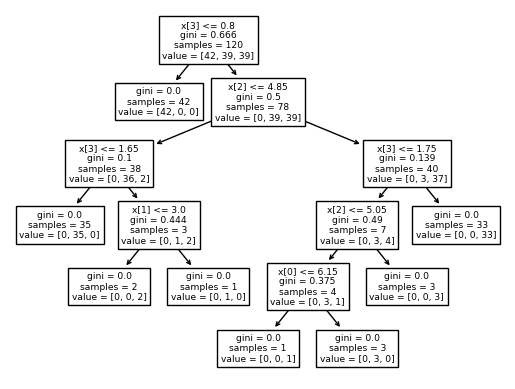

In [46]:
from sklearn.tree import DecisionTreeClassifier 
classifier = DecisionTreeClassifier() 
classifier.fit(X_train, y_train)

#построим делево решений
from sklearn import tree
tree.plot_tree(classifier)

y_pred = classifier.predict(X_test) 
y_pred

from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test, y_pred))

Задание 5 
Задание. Постройте модель регрессии для данных из предыдущей рабочей
тетради.Для примера можно взять потребления газа (в миллионах
галлонов) в 48 штатах США или набор данных о качестве красного вина:
https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/pet
rol_consumption.csv
https://raw.githubusercontent.com/aniruddhachoudhury/Red-WineQuality/master/winequality-red.csv
Постройте прогноз. Оцените точность модели

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

url = "https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv"
dataframe = pd.read_csv(url)
dataframe

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [54]:
y =dataframe["quality"]
u = dataframe.drop(columns='quality') 
X = u
X = np.c_[X, np.ones(X.shape[0])] 
y = np.c_[y]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
regressor = DecisionTreeRegressor() 
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

[5. 6. 7. 5. 5. 6. 6. 6. 5. 6. 5. 5. 6. 5. 5. 5. 7. 5. 5. 6. 7. 5. 6. 4.
 3. 5. 6. 6. 5. 7. 6. 5. 6. 5. 7. 7. 5. 6. 6. 5. 5. 6. 7. 6. 7. 5. 5. 6.
 4. 5. 6. 5. 6. 6. 5. 5. 5. 5. 7. 6. 5. 6. 7. 6. 5. 6. 5. 5. 8. 6. 6. 6.
 5. 5. 6. 6. 5. 5. 5. 7. 6. 5. 7. 5. 6. 5. 4. 5. 5. 5. 5. 6. 7. 6. 5. 6.
 7. 4. 5. 6. 6. 5. 6. 6. 4. 5. 4. 5. 6. 5. 6. 5. 8. 5. 5. 6. 5. 6. 7. 6.
 5. 4. 5. 5. 6. 6. 5. 6. 6. 7. 5. 6. 6. 7. 6. 5. 6. 5. 7. 5. 6. 6. 5. 6.
 5. 6. 8. 6. 5. 5. 6. 5. 5. 5. 6. 6. 6. 6. 7. 6. 5. 6. 6. 5. 5. 5. 6. 6.
 6. 6. 6. 5. 5. 6. 6. 6. 7. 6. 7. 5. 4. 7. 6. 6. 7. 5. 6. 6. 5. 5. 6. 6.
 6. 6. 5. 5. 5. 6. 5. 5. 5. 6. 6. 6. 3. 5. 6. 7. 6. 6. 5. 6. 5. 7. 5. 6.
 6. 7. 6. 5. 5. 4. 7. 6. 5. 6. 7. 6. 6. 5. 5. 6. 6. 5. 6. 6. 6. 7. 7. 6.
 5. 6. 5. 5. 7. 5. 5. 5. 5. 6. 6. 6. 6. 5. 6. 5. 5. 5. 6. 7. 5. 6. 5. 6.
 6. 5. 5. 5. 5. 6. 5. 5. 6. 6. 7. 6. 5. 6. 6. 5. 5. 7. 5. 5. 6. 5. 6. 5.
 7. 6. 5. 6. 6. 6. 6. 6. 6. 5. 6. 5. 6. 5. 6. 6. 6. 6. 6. 5. 6. 5. 5. 6.
 5. 4. 4. 7. 7. 5. 5. 7.]
     0
5.0  6
6.0  5
7.0 

8.649717043941411

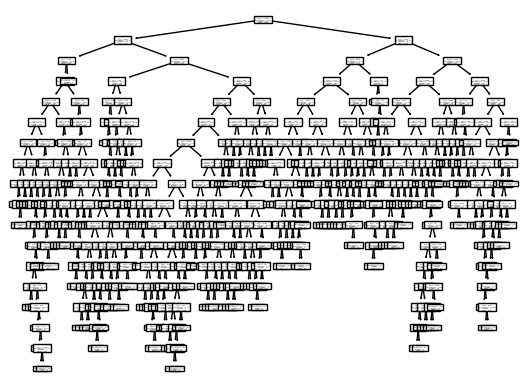

In [55]:
from sklearn import tree 
from sklearn import metrics 
tree.plot_tree(regressor)
y_pred = regressor.predict(X_test)
print(y_pred)
df=pd.DataFrame(y_test,y_pred)
print(df)
print(metrics.mean_squared_error(y_test, y_pred)) 
print(metrics.mean_absolute_error(y_test, y_pred))
metrics.mean_absolute_error(y_test, y_pred) / np.average(y) * 100

In [56]:
from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Squared Error: 0.70625
Mean Absolute Error: 0.4875
